In [83]:
import pandas as pd
import numpy as np
import time

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense 


import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset_master = pd.read_csv('used_cars_data.csv')
used_cars_df = dataset_master.copy()
used_cars_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,maruti,wagon
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,hyundai,creta
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,honda,jazz
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,maruti,ertiga
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4


In [4]:
used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7251 non-null   float64
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Seats              7199 non-null   float64
 7   New_Price          7252 non-null   float64
 8   Price              6019 non-null   float64
 9   mileage_num        7169 non-null   float64
 10  engine_num         7206 non-null   float64
 11  power_num          7077 non-null   float64
 12  Brand              7252 non-null   object 
 13  Model              7252 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 793.3+ KB


In [8]:
used_cars_df.duplicated().sum()

np.int64(2)

In [9]:
used_cars_df[used_cars_df.duplicated(keep=False) == True]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
3623,Hyderabad,2007,52195.0,Petrol,Manual,First,5.0,4.36,1.75,19.7,796.0,46.3,maruti,alto
4781,Hyderabad,2007,52195.0,Petrol,Manual,First,5.0,4.36,1.75,19.7,796.0,46.3,maruti,alto
6940,Kolkata,2017,13000.0,Diesel,Manual,First,5.0,13.58,NaN,26.0,1498.0,98.6,honda,city
7077,Kolkata,2017,13000.0,Diesel,Manual,First,5.0,13.58,NaN,26.0,1498.0,98.6,honda,city


In [10]:
used_cars_df.drop(4781, inplace=True)
used_cars_df.drop(7077, inplace=True)

In [11]:
used_cars_df.duplicated().sum()

np.int64(0)

In [12]:
used_cars_df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       1
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
New_Price               0
Price                1232
mileage_num            83
engine_num             46
power_num             175
Brand                   0
Model                   0
dtype: int64

In [16]:
used_cars_df = used_cars_df[used_cars_df["Price"].notna()].copy()
used_cars_df.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      1
Fuel_Type              0
Transmission           0
Owner_Type             0
Seats                 42
New_Price              0
Price                  0
mileage_num           70
engine_num            36
power_num            143
Brand                  0
Model                  0
dtype: int64

In [19]:
temp_data = used_cars_df[['Brand', 'Model']].copy()

In [20]:
temp_data

,Brand,Model
0,maruti,wagon
1,hyundai,creta
2,honda,jazz
3,maruti,ertiga
4,audi,a4
...,...,...
6014,maruti,swift
6015,hyundai,xcent
6016,mahindra,xylo
6017,maruti,wagon


In [23]:
used_cars_df=pd.get_dummies(used_cars_df, 
                            columns=used_cars_df.select_dtypes(include=['object', 'int64']).columns.tolist(),
                            drop_first=True,
                            dtype=int)

In [25]:
used_cars_df = pd.concat([used_cars_df, temp_data], axis=1)

In [28]:
used_cars_df.head()


,Kilometers_Driven,Seats,New_Price,Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Brand,Model
0,72000.0,5.0,5.51,1.75,26.60,998.0,58.16,0,0,0,...,0,0,0,0,0,0,0,0,maruti,wagon
1,41000.0,5.0,16.06,12.50,19.67,1582.0,126.20,0,0,0,...,0,0,0,0,0,0,0,0,hyundai,creta
2,46000.0,5.0,8.61,4.50,18.20,1199.0,88.70,0,1,0,...,0,0,0,0,0,0,0,0,honda,jazz
3,87000.0,7.0,11.27,6.00,20.77,1248.0,88.76,0,1,0,...,0,0,0,0,0,0,0,0,maruti,ertiga
4,40670.0,5.0,53.14,17.74,15.20,1968.0,140.80,0,0,1,...,0,0,0,0,0,0,0,0,audi,a4


In [29]:
#split the dataset in predictors and target 
x = used_cars_df.drop('Price', axis=1)
y = used_cars_df['Price']

In [ ]:
#Split the dataset in 80:20 ratio for train and temp data
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=1)
#split the temp dataset in validation and test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=1)


In [34]:
#print Number of rows in each dataset
print ("Number of rows in training dataset: ", x_train.shape[0])
print ("Number of rows in validation dataset: ", x_train.shape[0])
print ("Number of rows in test dataset: ", x_train.shape[0])

Number of rows in training dataset:  4814
Number of rows in validation dataset:  4814
Number of rows in test dataset:  4814


In [37]:
def print_missing_value_count(df):
    """
        Filters and prints columns and counts of missing values in then
        Input: dataframe
        Output:  
    """
    missing_value_columns = df.columns[df.isnull().any()]
    missing_value_count = df[missing_value_columns].isnull().sum()
    print(missing_value_count)

In [39]:
print_missing_value_count(x_train)

Kilometers_Driven      1
Seats                 39
mileage_num           59
engine_num            34
power_num            116
dtype: int64


In [40]:
print_missing_value_count(x_val)

Seats           1
mileage_num     5
power_num      13
dtype: int64


In [41]:
print_missing_value_count(x_test)

Seats           2
mileage_num     6
engine_num      2
power_num      14
dtype: int64


In [49]:
grouped_median_train = x_train.groupby(['Brand', 'Model'])['Seats'].median()
grouped_median_train

Brand       Model  
ambassador  classic    5.0
audi        a3         5.0
            a4         5.0
            a6         5.0
            a7         5.0
                      ... 
volvo       s60        5.0
            s80        5.0
            v40        5.0
            xc60       5.0
            xc90       7.0
Name: Seats, Length: 209, dtype: float64

In [51]:
x_train['Seats'] = x_train.apply(lambda row : row['Seats'] if not pd.isna(row['Seats']) else grouped_median_train.get((row['Brand'], row['Model']), np.nan), axis=1)

In [52]:
x_train[x_train['Seats'].isnull()]

,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Brand,Model
2369,56000.0,NaN,7.88,19.5,1061.0,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,maruti,estilo
5893,51000.0,NaN,7.88,19.5,1061.0,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,maruti,estilo


In [53]:
x_train['Seats'] = x_train['Seats'].fillna(5.0)
x_train[x_train['Seats'].isnull()]

,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Brand,Model


In [59]:
x_val['Seats'] = x_val.apply(lambda row: row['Seats'] if not pd.isna(row['Seats']) else grouped_median_train.get((row['Brand'], row['Model']), np.nan), axis=1)
x_val[x_val['Seats'].isnull()]

,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Brand,Model
3882,40000.0,NaN,7.88,19.5,1061.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,maruti,estilo


In [60]:
x_val['Seats'] = x_val['Seats'].fillna(5.0)
x_val[x_val['Seats'].isnull()]

,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Brand,Model


In [61]:
x_test['Seats'] = x_test.apply(lambda row: row['Seats'] if not pd.isna(row['Seats']) else grouped_median_train.get((row['Brand'], row['Model']), np.nan), axis=1)
x_test[x_test['Seats'].isnull()]

,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest,Brand,Model


In [62]:
print_missing_value_count(x_train)

Kilometers_Driven      1
mileage_num           59
engine_num            34
power_num            116
dtype: int64


In [63]:
print_missing_value_count(x_val)

mileage_num     5
power_num      13
dtype: int64


In [64]:
print_missing_value_count(x_test)

mileage_num     6
engine_num      2
power_num      14
dtype: int64


In [70]:
column_list = ['Kilometers_Driven', 'mileage_num', 'engine_num', 'power_num']
grouped_median_train = x_train.groupby(['Brand', 'Model'])[column_list].median()
grouped_median_train

Kilometers_Driven  mileage_num  engine_num  power_num
Brand      Model                                                         
ambassador classic            80000.0       12.800      1489.0     35.500
audi       a3                 30500.0       20.380      1968.0    143.000
           a4                 46456.5       16.550      1968.0    155.355
           a6                 54862.0       17.680      1968.0    179.500
           a7                 33360.0       14.400      2967.0    241.400
...                               ...          ...         ...        ...
volvo      s60                46629.5       18.015      1976.5    185.500
           s80                85549.0       14.550      2400.0    215.000
           v40                38000.0       16.800      1984.0    150.000
           xc60               90034.5       14.100      2192.5    198.000
           xc90               95615.5       11.100      2400.0    200.000

[209 rows x 4 columns]

In [73]:
for column in column_list:
    x_train[column] = x_train.apply(lambda row: row[column] if not pd.isna(row[column]) else grouped_median_train[column].get((row['Brand'], row['Model']), np.nan), axis=1)
    x_val[column] = x_val.apply(lambda row: row[column] if not pd.isna(row[column]) else grouped_median_train[column].get((row['Brand'], row['Model']), np.nan), axis=1)
    x_test[column] = x_test.apply(lambda row: row[column] if not pd.isna(row[column]) else grouped_median_train[column].get((row['Brand'], row['Model']), np.nan), axis=1)

In [74]:
print_missing_value_count(x_train)
print_missing_value_count(x_val)
print_missing_value_count(x_test)

mileage_num    7
power_num      9
dtype: int64
mileage_num    1
power_num      1
dtype: int64
mileage_num    1
power_num      1
dtype: int64


In [76]:
column_list = ['mileage_num', 'power_num']
grouped_median_train = x_train.groupby(x_train['Brand'])[column_list].median()
grouped_median_train

,mileage_num,power_num
Brand,,
ambassador,12.800,35.50
audi,15.730,174.33
bentley,8.600,552.00
bmw,17.050,190.00
chevrolet,18.200,79.40
datsun,21.665,60.32
fiat,18.400,88.70
force,17.000,139.04
ford,18.880,89.84


In [78]:
for column in column_list:
    x_train[column] = x_train.apply(lambda row : row[column] if not pd.isna(row[column]) else grouped_median_train[column].get((row['Brand']), np.nan), axis=1)
    x_val[column] = x_val.apply(lambda row : row[column] if not pd.isna(row[column]) else grouped_median_train[column].get((row['Brand']), np.nan), axis=1)
    x_test[column] = x_test.apply(lambda row : row[column] if not pd.isna(row[column]) else grouped_median_train[column].get((row['Brand']), np.nan), axis=1)

In [79]:
print_missing_value_count(x_train)
print_missing_value_count(x_val)
print_missing_value_count(x_test)

mileage_num    1
power_num      1
dtype: int64
Series([], dtype: float64)
Series([], dtype: float64)


In [81]:
for column in column_list:
    x_train[column] = x_train[column].fillna(used_cars_df[column].median())
print_missing_value_count(x_train)
print_missing_value_count(x_val)
print_missing_value_count(x_test)

Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)


In [82]:
x_train = x_train.drop(['Brand', 'Model'], axis=1)
x_val = x_val.drop(['Brand', 'Model'], axis=1)
x_test = x_test.drop(['Brand', 'Model'], axis=1)

In [84]:
num_columns = ["Kilometers_Driven", "Seats", "New_Price", "mileage_num", "engine_num", "power_num"]

scaler = StandardScaler()

scaler.fit(x_train[num_columns])

,copy,True
,with_mean,True
,with_std,True


In [85]:
x_train[num_columns] = scaler.transform(x_train[num_columns])
x_val[num_columns] = scaler.transform(x_val[num_columns])
x_test[num_columns] = scaler.transform(x_test[num_columns])

In [86]:
x_train.head()

,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
4269,-0.694078,-0.351313,-0.637638,1.136662,-1.034356,-0.841807,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025,-0.081329,2.126668,-0.674075,-0.765611,-0.708133,-0.731916,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5776,-0.469629,-0.351313,1.297640,-0.287665,0.563805,1.136412,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1710,-0.365282,-0.351313,-0.517681,0.732429,-0.706486,-0.545692,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2363,-0.978527,-0.351313,-0.572951,0.137969,-0.706486,-0.565973,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
def plot(history, name):
    
    fig, ax = plt.subplots()
    plt.plot(history.history[name])
    plt.plot(history.history['val_'+ name])

    plt.title('Model ' + name.capitalize())
    plt.xlabel(name.capitalize())
    plt.ylabel('Epoch')

    fig.legend(['Train', 'Validation'], loc="outside right upper")

In [214]:
#Functions to calculate the performance metrics

#Function to calculate Adjuested R2 Score
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score (targets-predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]

    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

#Funciton to calculate MAPE 
def mape(targets, predictions):
    np.mean(np.abs(targets - predictions) / targets) * 100

def model_performance(model, predictors, target):
    
    pred = model.pred(predictors).reshape(-1)

    r2 = r2_score(target- pred)
    adj_r2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape(target, pred)

    df_perf = {
        "r2_score": [r2],
        "adj_r2_Score":[adj_r2],
        "rmse": [rmse],
        "mae":[mae],
        "mape": [mape],
    }
    return df_perf

columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","time(secs)","Train_loss","Valid_loss","Train_R-squared","Valid_R-squared"]

results = pd.DataFrame(columns=columns)


In [215]:
metrics = [tf.keras.metrics.R2Score(name="r2_score")]
clear_session = tf.keras.backend.clear_session()
optimizor = keras.optimizers.SGD()

In [216]:
#Model 0 - No hidden layer and SGD as our optimizor
clear_session

In [217]:
model = Sequential()
model.add(Dense(1, input_dim=x_train.shape[1]))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │           285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285 (1.11 KB)

 Trainable params: 285 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [218]:
model.compile(loss="mean_squared_error", optimizer=optimizor, metrics=metrics, run_eagerly=True)

In [219]:
epochs  = 10
batch_size = x_train.shape[0]
start = time.time()

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs = epochs)

end = time.time()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 215.3539 - r2_score: -0.7003 - val_loss: 231.5314 - val_r2_score: -0.6367
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 199.6069 - r2_score: -0.5760 - val_loss: 215.0228 - val_r2_score: -0.5200
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 185.3908 - r2_score: -0.4637 - val_loss: 200.0699 - val_r2_score: -0.4143
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 172.5472 - r2_score: -0.3623 - val_loss: 186.5152 - val_r2_score: -0.3184
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 160.9350 - r2_score: -0.2706 - val_loss: 174.2184 - val_r2_score: -0.2315
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 150.4284 - r2_score: -0.1877 - val_loss: 163.0538 - val_r2_score: -0.1526
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 140.9150 - r2_score: -0.1126 - val_loss: 152.9092 - val_r2_score: -0.0809
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 132.2944 - r2_score: -0.04

In [220]:
print("Total time taken in seconds: ", end-start)

Total time taken in seconds:  0.5120928287506104


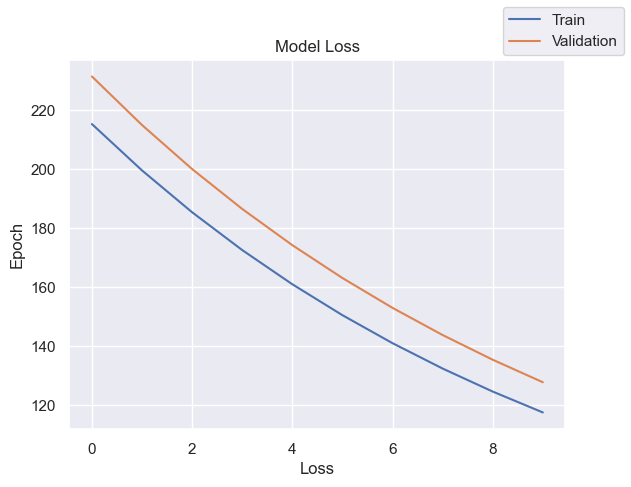

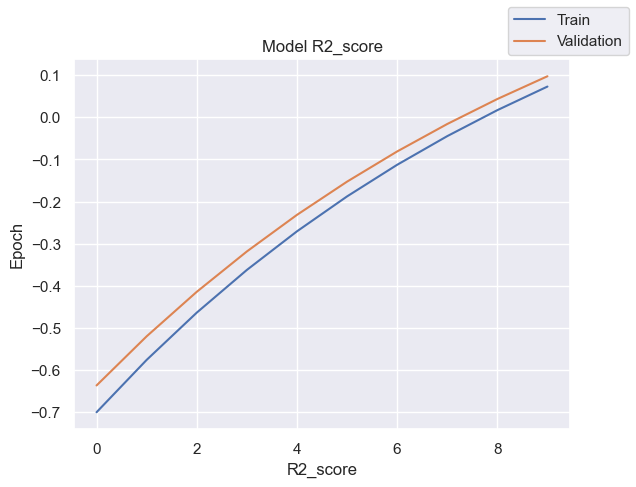

In [221]:
plot(history=history, name='loss')
plot(history=history, name='r2_score')

In [222]:
results.loc[0] = [0,0,"N/A", 10, x_train.shape[0], "SGD", round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], history.history['r2_score'][-1], history.history['val_r2_score'][-1]]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,0,0,N/A,10,4814,SGD,0.51,117.381905,127.640442,0.073229,0.097727


In [223]:
#Model 1 -  Incresing the # of epocs to see if there is performance improvement by adding more passes of the data
clear_session

In [224]:
model = Sequential()
model.add(Dense(1, input_dim= x_train.shape[1]))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │           285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285 (1.11 KB)

 Trainable params: 285 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [225]:
optimizor = keras.optimizers.SGD()
model.compile(loss="mean_squared_error", optimizer=optimizor, metrics=metrics, run_eagerly=True)

In [226]:
epochs = 25
batch_size = x_train.shape[1]


start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
end = time.time()

Epoch 1/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 134.3478 - r2_score: -0.0405 - val_loss: 89.4763 - val_r2_score: 0.3675
Epoch 2/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 62.4295 - r2_score: 0.5071 - val_loss: 53.5075 - val_r2_score: 0.6218
Epoch 3/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 46.2839 - r2_score: 0.6346 - val_loss: 43.9133 - val_r2_score: 0.6896
Epoch 4/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.4054 - r2_score: 0.6731 - val_loss: 40.1438 - val_r2_score: 0.7162
Epoch 5/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39.3500 - r2_score: 0.6893 - val_loss: 38.5553 - val_r2_score: 0.7275
Epoch 6/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38.2185 - r2_score: 0.6983 - val_loss: 37.6089 - val_r2_score: 0.7341
Epoch 7/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.5030 - r2_score: 0.7039 - val_loss: 36.8258 - val_r2_score: 0.7397
Epoch 8/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.9045 - r2_score: 0.7086 - val_loss: 36.26

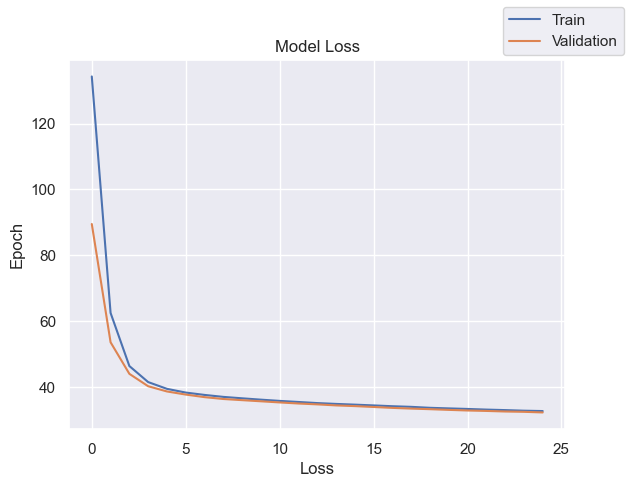

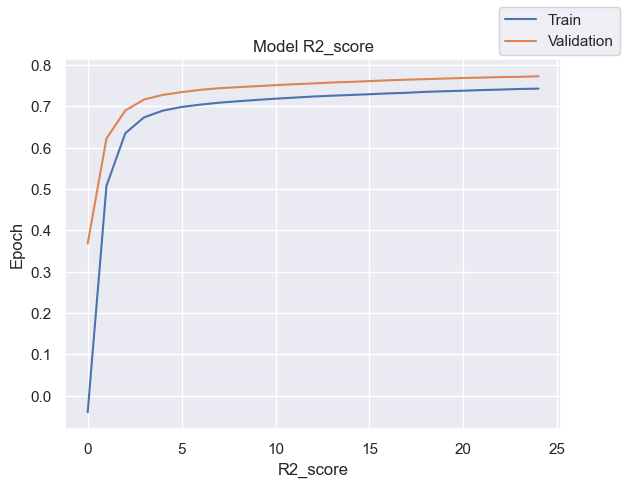

In [227]:
plot(history=history, name='loss')
plot(history=history, name='r2_score')

In [228]:
results.loc[1] = [0,0,"N/A", 25, x_train.shape[0], "SGD", round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], history.history['r2_score'][-1], history.history['val_r2_score'][-1]]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,0,0,N/A,10,4814,SGD,0.51,117.381905,127.640442,0.073229,0.097727
1,0,0,N/A,25,4814,SGD,3.05,32.594547,32.170887,0.742655,0.772588


In [229]:
# Model 2 - Update the previous model to decrese the batch size and run on a small subset  of the training data
clear_session

In [230]:
model = Sequential()
model.add(Dense(1, input_dim=x_train.shape[1]))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │           285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285 (1.11 KB)

 Trainable params: 285 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [231]:
optimizer = keras.optimizers.SGD()
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics)

In [232]:
epochs = 25
batch_size = 32
start = time.time()

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)

end = time.time()

Epoch 1/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53.2304 - r2_score: 0.6037 - val_loss: 35.9153 - val_r2_score: 0.7461
Epoch 2/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 35.4238 - r2_score: 0.7203 - val_loss: 33.6088 - val_r2_score: 0.7624
Epoch 3/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 33.6016 - r2_score: 0.7347 - val_loss: 32.4740 - val_r2_score: 0.7704
Epoch 4/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 32.2900 - r2_score: 0.7451 - val_loss: 32.5726 - val_r2_score: 0.7697
Epoch 5/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 31.4802 - r2_score: 0.7515 - val_loss: 30.5379 - val_r2_score: 0.7841
Epoch 6/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 30.6522 - r2_score: 0.7580 - val_loss: 29.8248 - val_r2_score: 0.7892
Epoch 7/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 30.2753 - r2_score: 0.7610 - val_loss: 28.7549 - val_r2_score: 0.7967
Epoch 8/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 29.9024 - r2_sco

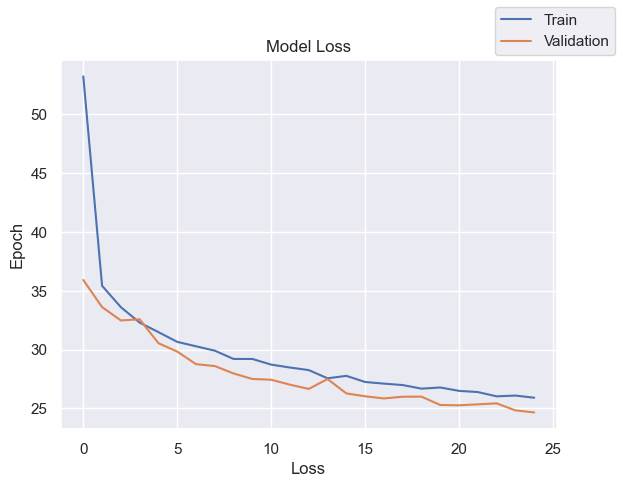

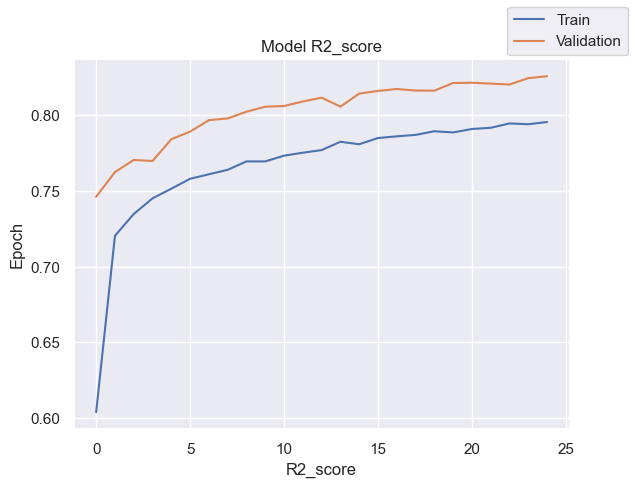

In [233]:
plot(history=history, name='loss')
plot(history=history, name="r2_score")

In [234]:
results.loc[2] = [0, 0, 'N/A', 25, 32, "SGD", round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], history.history['r2_score'][-1], history.history['val_r2_score'][-1]]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,0,0,N/A,10,4814,SGD,0.51,117.381905,127.640442,0.073229,0.097727
1,0,0,N/A,25,4814,SGD,3.05,32.594547,32.170887,0.742655,0.772588
2,0,0,N/A,25,32,SGD,2.37,25.899328,24.647652,0.795516,0.825769


In [235]:
#Model 3 - Increasing the batch size to 64 on the above model to see if the performance improves
clear_session

In [236]:
model = Sequential()
model.add(Dense(1, input_dim = x_train.shape[1]))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │           285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285 (1.11 KB)

 Trainable params: 285 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [237]:
optimizer = keras.optimizers.SGD()
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics)

In [238]:
epochs = 25
batch_size=64

start = time.time()

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)

end = time.time()

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68.1988 - r2_score: 0.5066 - val_loss: 39.4721 - val_r2_score: 0.7210
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 37.6473 - r2_score: 0.7028 - val_loss: 35.8879 - val_r2_score: 0.7463
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 35.6684 - r2_score: 0.7184 - val_loss: 35.8533 - val_r2_score: 0.7466
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 34.6864 - r2_score: 0.7261 - val_loss: 33.8576 - val_r2_score: 0.7607
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 33.5400 - r2_score: 0.7352 - val_loss: 33.3554 - val_r2_score: 0.7642
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 33.0126 - r2_score: 0.7394 - val_loss: 32.1333 - val_r2_score: 0.7729
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 32.2626 - r2_score: 0.7453 - val_loss: 31.2093 - val_r2_score: 0.7794
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 31.8591 - r2_score: 0.7485 - val

In [239]:
print("Total time taken: ", end-start)

Total time taken:  1.795624017715454


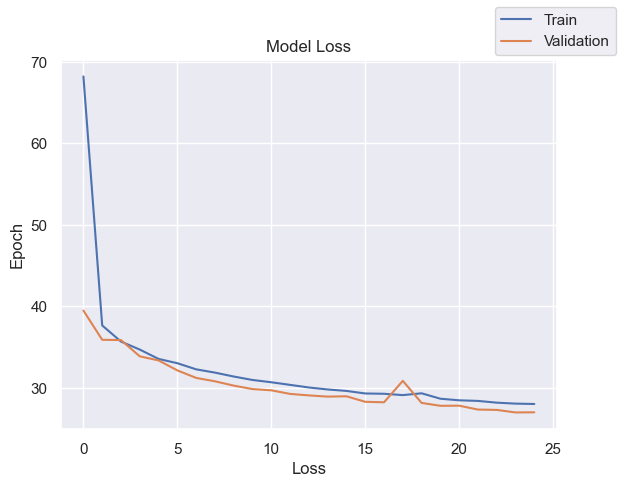

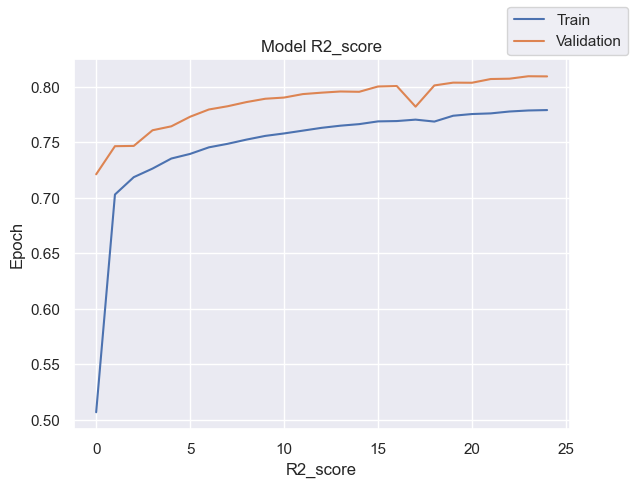

In [240]:
plot(history=history, name='loss')
plot(history=history, name='r2_score')

In [241]:
results.loc[3] = [0, 0, "N/A", 25, 64, "SGD", round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], history.history['r2_score'][-1], history.history['val_r2_score'][-1]]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,0,0,N/A,10,4814,SGD,0.51,117.381905,127.640442,0.073229,0.097727
1,0,0,N/A,25,4814,SGD,3.05,32.594547,32.170887,0.742655,0.772588
2,0,0,N/A,25,32,SGD,2.37,25.899328,24.647652,0.795516,0.825769
3,0,0,N/A,25,64,SGD,1.80,28.009520,26.990870,0.778855,0.809205


In [242]:
# Model 4 - add hidden layer with 128 nuerons and use sigmoid as the activation function
clear_session

In [243]:
model = Sequential()
model.add(Dense(128, activation="sigmoid",input_dim = x_train.shape[1] ))
model.add(Dense(1))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        36,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 36,609 (143.00 KB)

 Non-trainable params: 0 (0.00 B)

In [244]:
optimizer= keras.optimizers.SGD()
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=metrics)

In [245]:
epochs= 25
batch_size = 64
start = time.time()

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)

end = time.time()

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66.9694 - r2_score: 0.5130 - val_loss: 51.2715 - val_r2_score: 0.6376
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 37.3539 - r2_score: 0.7051 - val_loss: 34.7288 - val_r2_score: 0.7545
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 33.7367 - r2_score: 0.7336 - val_loss: 30.8353 - val_r2_score: 0.7820
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 30.8688 - r2_score: 0.7563 - val_loss: 28.1802 - val_r2_score: 0.8008
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 29.0150 - r2_score: 0.7709 - val_loss: 26.8657 - val_r2_score: 0.8101
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 27.1107 - r2_score: 0.7860 - val_loss: 24.4227 - val_r2_score: 0.8274
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 25.7464 - r2_score: 0.7967 - val_loss: 22.7121 - val_r2_score: 0.8395
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 23.9003 - r2_score: 0.8113 - val

In [246]:
print("Total time taken: ", end-start)

Total time taken:  2.0862770080566406


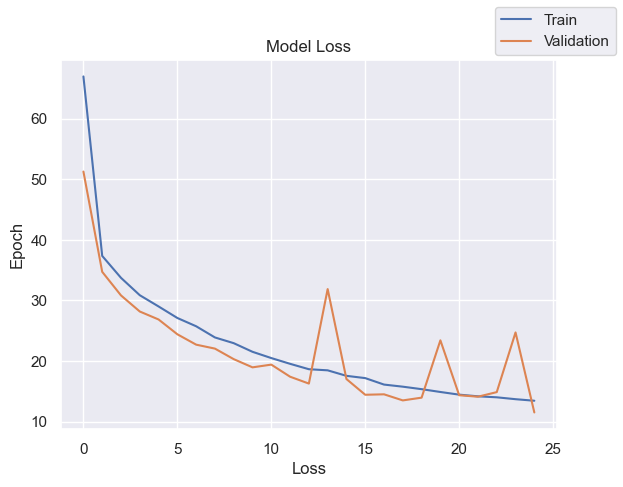

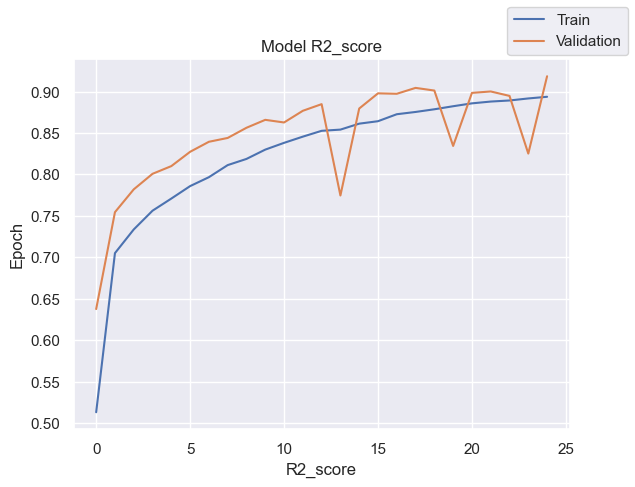

In [247]:
plot(history=history, name='loss')
plot(history=history, name='r2_score')

In [248]:
results.loc[4] = [1, 128, 'Sigmoid', 25, 64, 'SGD', round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], history.history['r2_score'][-1], history.history['val_r2_score'][-1]]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,0,0,N/A,10,4814,SGD,0.51,117.381905,127.640442,0.073229,0.097727
1,0,0,N/A,25,4814,SGD,3.05,32.594547,32.170887,0.742655,0.772588
2,0,0,N/A,25,32,SGD,2.37,25.899328,24.647652,0.795516,0.825769
3,0,0,N/A,25,64,SGD,1.80,28.009520,26.990870,0.778855,0.809205
4,1,128,Sigmoid,25,64,SGD,2.09,13.456893,11.524213,0.893753,0.918537


In [249]:
#Model 5 - Change the activation function of the nuerons from sigmoid to tanh
clear_session

In [250]:
model = Sequential()
model.add(Dense(128, activation="tanh", input_dim = x_train.shape[1]))
model.add(Dense(1))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │        36,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 36,609 (143.00 KB)

 Non-trainable params: 0 (0.00 B)

In [251]:
optimizer = keras.optimizers.SGD()
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics)

In [252]:
epochs = 25
batch_size = 64

start = time.time()

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)

end = time.time()


Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.5211 - r2_score: 0.6611 - val_loss: 46.6579 - val_r2_score: 0.6702
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 32.2476 - r2_score: 0.7454 - val_loss: 34.5267 - val_r2_score: 0.7559
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 27.8810 - r2_score: 0.7799 - val_loss: 19.6003 - val_r2_score: 0.8614
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 25.3876 - r2_score: 0.7996 - val_loss: 23.5824 - val_r2_score: 0.8333
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 21.1072 - r2_score: 0.8334 - val_loss: 18.7419 - val_r2_score: 0.8675
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 19.3596 - r2_score: 0.8471 - val_loss: 14.3154 - val_r2_score: 0.8988
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 19.3064 - r2_score: 0.8476 - val_loss: 13.6187 - val_r2_score: 0.9037
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 16.9169 - r2_score: 0.8664 - val

In [253]:
print("Total time taken: ", end-start)

Total time taken:  2.0541231632232666


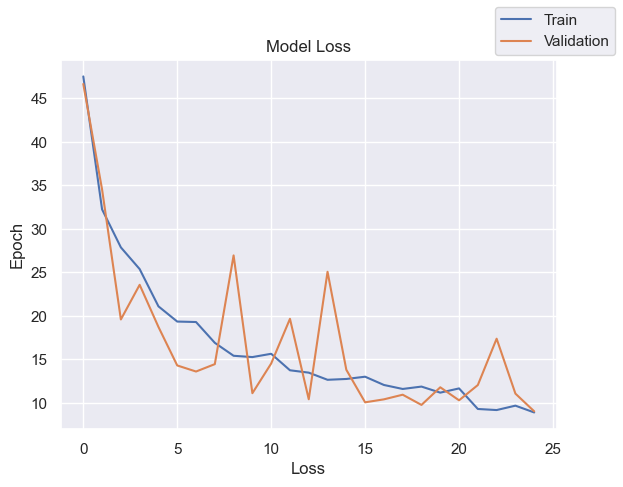

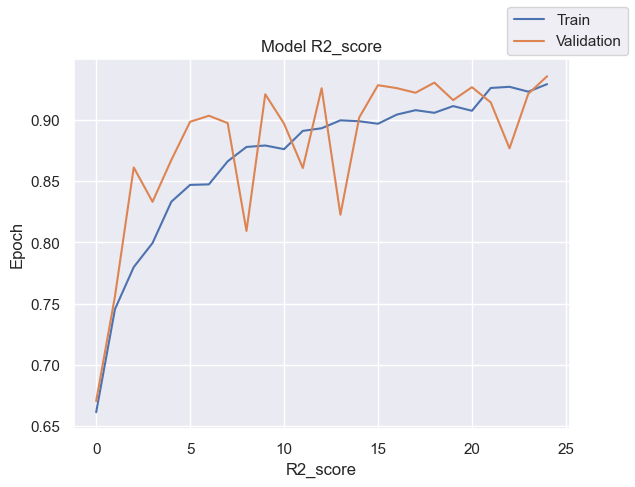

In [254]:
plot(history=history, name='loss')
plot(history=history, name='r2_score')

In [255]:
results.loc[5] = [1, 128, "tanh", 25, 64, "SGD", round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], history.history['r2_score'][-1], history.history['val_r2_score'][-1]]

In [256]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,0,0,N/A,10,4814,SGD,0.51,117.381905,127.640442,0.073229,0.097727
1,0,0,N/A,25,4814,SGD,3.05,32.594547,32.170887,0.742655,0.772588
2,0,0,N/A,25,32,SGD,2.37,25.899328,24.647652,0.795516,0.825769
3,0,0,N/A,25,64,SGD,1.80,28.009520,26.990870,0.778855,0.809205
4,1,128,Sigmoid,25,64,SGD,2.09,13.456893,11.524213,0.893753,0.918537
5,1,128,tanh,25,64,SGD,2.05,8.916199,9.044289,0.929604,0.936067


In [257]:
#Model 6 - Change activation fuinction to relu
clear_session

In [258]:
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=x_train.shape[1]))
model.add(Dense(1))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │        36,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,609 (143.00 KB)

 Trainable params: 36,609 (143.00 KB)

 Non-trainable params: 0 (0.00 B)

In [259]:
optimizer = keras.optimizers.SGD()
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=metrics)

In [260]:
epochs = 25
batch_size = 64

start = time.time()

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)

end = time.time()

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.5248 - r2_score: 0.7047 - val_loss: 23.7226 - val_r2_score: 0.8323
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 26.8604 - r2_score: 0.7879 - val_loss: 34.3378 - val_r2_score: 0.7573
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 25.2608 - r2_score: 0.8006 - val_loss: 21.0207 - val_r2_score: 0.8514
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 21.4058 - r2_score: 0.8310 - val_loss: 24.2628 - val_r2_score: 0.8285
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 20.8476 - r2_score: 0.8354 - val_loss: 14.7401 - val_r2_score: 0.8958
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 20.7105 - r2_score: 0.8365 - val_loss: 13.8597 - val_r2_score: 0.9020
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 19.9479 - r2_score: 0.8425 - val_loss: 68.5886 - val_r2_score: 0.5152
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 17.7459 - r2_score: 0.8599 - val

In [261]:
print("Total time taken: ", end-start)

Total time taken:  2.176184892654419


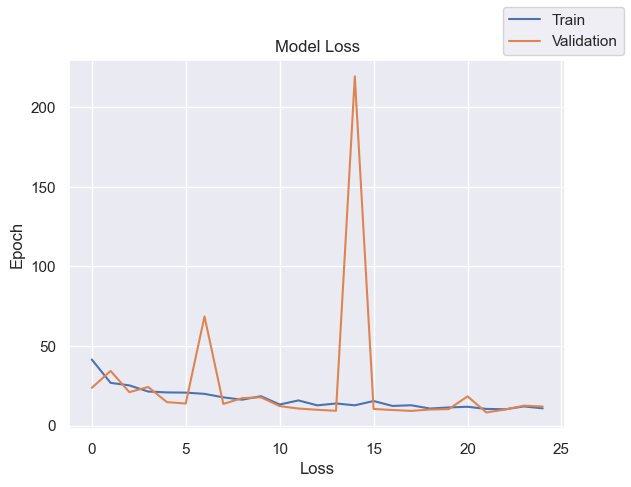

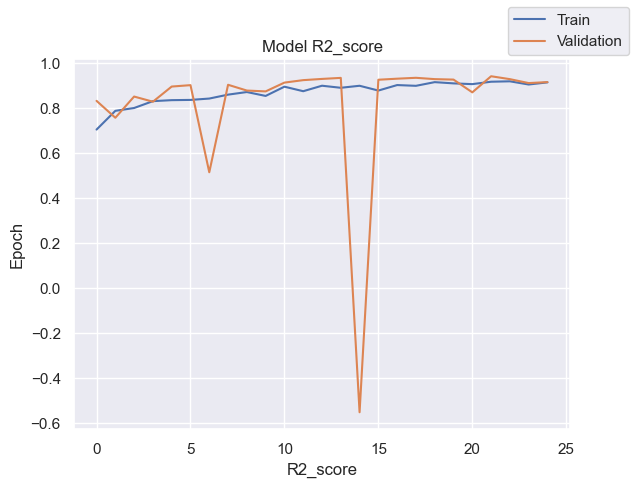

In [262]:
plot(history=history, name='loss')
plot(history=history, name='r2_score')

In [263]:
results.loc[6] = [1, 128, "relu", 25, 64, "SGD", round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], history.history['r2_score'][-1], history.history['val_r2_score'][-1]]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,0,0,N/A,10,4814,SGD,0.51,117.381905,127.640442,0.073229,0.097727
1,0,0,N/A,25,4814,SGD,3.05,32.594547,32.170887,0.742655,0.772588
2,0,0,N/A,25,32,SGD,2.37,25.899328,24.647652,0.795516,0.825769
3,0,0,N/A,25,64,SGD,1.80,28.009520,26.990870,0.778855,0.809205
4,1,128,Sigmoid,25,64,SGD,2.09,13.456893,11.524213,0.893753,0.918537
5,1,128,tanh,25,64,SGD,2.05,8.916199,9.044289,0.929604,0.936067
6,1,128,relu,25,64,SGD,2.18,10.843023,11.942695,0.914391,0.915579


In [264]:
#Model 7 - Add another activation layer with 32 nueron and using relu as the activation function 
clear_session

In [266]:
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=x_train.shape[1]))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 128)            │        36,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,641 (158.75 KB)

 Trainable params: 40,641 (158.75 KB)

 Non-trainable params: 0 (0.00 B)

In [267]:
optimizer = keras.optimizers.SGD()
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=metrics)

In [268]:
epochs = 25
batch_size=64

start = time.time()

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)

end = time.time()

Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 104.3335 - r2_score: 0.2674 - val_loss: 107.5495 - val_r2_score: 0.2397
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 79.4161 - r2_score: 0.3730 - val_loss: 74.4890 - val_r2_score: 0.4734
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 83.6755 - r2_score: 0.3394 - val_loss: 38.5060 - val_r2_score: 0.7278
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 80.8142 - r2_score: 0.3619 - val_loss: 110.4411 - val_r2_score: 0.2193
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 87.6554 - r2_score: 0.3079 - val_loss: 99.0995 - val_r2_score: 0.2995
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 81.0541 - r2_score: 0.3601 - val_loss: 87.8144 - val_r2_score: 0.3793
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 76.8975 - r2_score: 0.3929 - val_loss: 80.5654 - val_r2_score: 0.4305
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 74.8455 - r2_score: 0.4091 - 

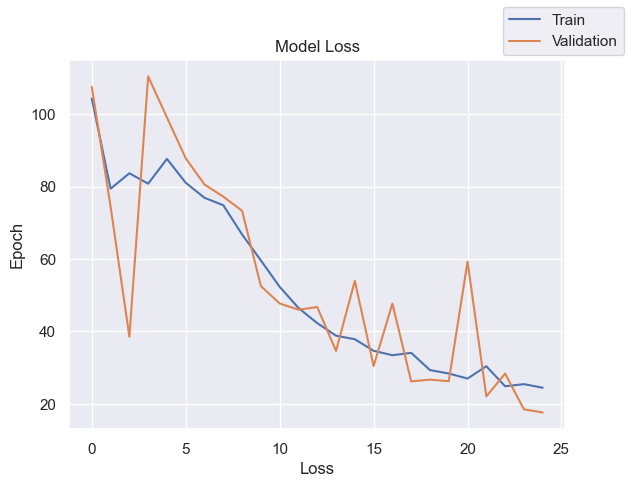

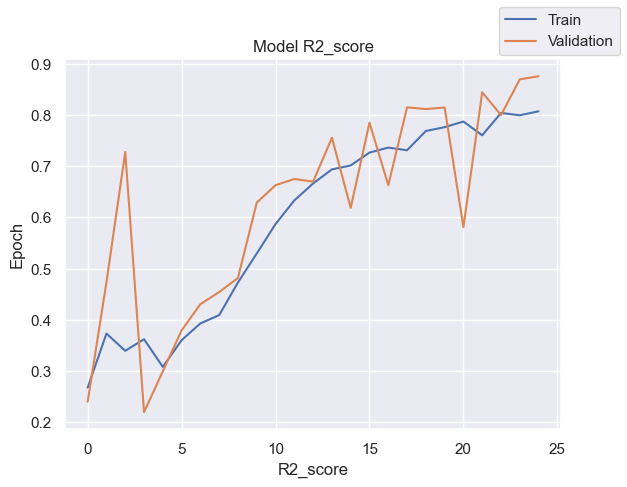

In [269]:
plot(history=history, name='loss')
plot(history=history, name='r2_score')

In [270]:
results.loc[7] = [2, [128, 32], ["relu", "relu"], 25, 64, "SGD", round(end-start, 2), history.history['loss'][-1], history.history['val_loss'][-1], history.history['r2_score'][-1], history.history['val_r2_score'][-1]]
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_R-squared,Valid_R-squared
0,0,0,N/A,10,4814,SGD,0.51,117.381905,127.640442,0.073229,0.097727
1,0,0,N/A,25,4814,SGD,3.05,32.594547,32.170887,0.742655,0.772588
2,0,0,N/A,25,32,SGD,2.37,25.899328,24.647652,0.795516,0.825769
3,0,0,N/A,25,64,SGD,1.80,28.009520,26.990870,0.778855,0.809205
4,1,128,Sigmoid,25,64,SGD,2.09,13.456893,11.524213,0.893753,0.918537
5,1,128,tanh,25,64,SGD,2.05,8.916199,9.044289,0.929604,0.936067
6,1,128,relu,25,64,SGD,2.18,10.843023,11.942695,0.914391,0.915579
7,2,"[128, 32]","[relu, relu]",25,64,SGD,2.34,24.407482,17.579241,0.807294,0.875735


In [ ]:
results